In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency, ttest_ind, shapiro
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from pyproj import Transformer

## **Latar Belakang**

New York City adalah salah satu kota tersibuk di dunia, dengan jutaan orang yang bepergian setiap harinya. Dalam konteks ini, layanan taksi memainkan peran vital sebagai bagian dari sistem transportasi umum bersama subway, bus, dan layanan rideshare (seperti Uber dan Lyft). Dalam dataset ini terdapat 2 vendor penyedia layanan taksi yaitu:

1. CMT (Creative Mobile Technologies)
2. VeriFone Inc

Kedua vendor ini bersaing dalam menyediakan solusi teknologi yang digunakan oleh pengemudi dan penumpang dalam proses operasional harian. Meski menggunakan sistem yang serupa, performa operasional masing-masing vendor dapat bervariasi, baik dari sisi produktivitas pengemudi, tingkat penggunaan metode pembayaran, hingga rata-rata pendapatan per perjalanan.


## **Pernyataan Masalah**

Perusahaan CMT ingin mengetahui **bagaimana perbandingan performa operasionalnya terhadap pesaingnya yaitu VeriFone Inc**, berdasarkan data perjalanan taksi yang tercatat. Dengan mengetahui perbedaan performa driver dari CMT maka kita dapat mengetahui kekurangannya dan melakukan suatu tindakan yang dapat menutup kekurangan performa tersebut.

Sebagai data analyst dari Vendor CMT, tujuan utama saya adalah untuk **tujuan utama saya adalah membandingkan data perjalanan taksi terhadap  kompetitor (VeriFone Inc) serta memberikan rekomendasi terkait kekurangannya**

## **Data**
- Berikut data yang digunakan untuk melakukan analisa

In [226]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(), df.tail())

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3674901756.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


**Penjelasan Kolom**

VendorID - ID penyedia layanan taksi. Biasanya:

- 1 = Creative Mobile Technologies (CMT)
- 2 = VeriFone Inc.

lpep_pickup_datetime - Waktu penjemputan penumpang.

lpep_dropoff_datetime - Waktu penurunan penumpang.

store_and_fwd_flag - Indikator apakah data perjalanan sementara disimpan sebelum dikirim ke server:

- Y = Data disimpan sementara.
- N = Data dikirim langsung ke server.

RatecodeID - Kode tarif yang digunakan dalam perjalanan:

- 1 = Tarif standar.
- 2 = Tarif perjalanan ke bandara JFK.
- 3 = Tarif perjalanan ke bandara Newark.
- 4 = Perjalanan dengan tarif yang dinegosiasikan sebelumnya.
- 5 = Tarif perjalanan gratis.
- 6 = Perjalanan ke luar kota yang telah ditentukan tarifnya.

PULocationID - ID lokasi penjemputan (berdasarkan zona taksi NYC).

DOLocationID - ID lokasi tujuan penumpang (berdasarkan zona taksi NYC).

passenger_count - Jumlah penumpang dalam perjalanan.

trip_distance - Jarak perjalanan dalam mil.

fare_amount - Tarif dasar perjalanan dalam dolar.

extra - Biaya tambahan, seperti:

- 1.00 = Tambahan biaya perjalanan malam hari (20:00 - 06:00).
- 0.50 = Biaya tambahan jam sibuk.

mta_tax - Pajak Metro Transit Authority (MTA) sebesar $0.50 per perjalanan.

tip_amount - Jumlah tip yang diberikan penumpang (jika pembayaran non-tunai).

tolls_amount - Jumlah biaya tol selama perjalanan.

ehail_fee - Biaya pemesanan elektronik (biasanya NaN untuk taksi reguler).

improvement_surcharge - Biaya tambahan per perjalanan ($0.30).

total_amount - Total biaya perjalanan termasuk tarif, pajak, tol, dan tip.

payment_type - Jenis pembayaran:

- 1 = Kartu kredit.
- 2 = Tunai.
- 3 = Tanpa biaya (misalnya perjalanan promosi).
- 4 = Dispute (pembayaran dipermasalahkan).
- 5 = Pembayaran lain.
- 6 = Voided trip (perjalanan yang dibatalkan).

trip_type - Jenis perjalanan:

- 1 = Perjalanan reguler.
- 2 = Perjalanan yang dipesan sebelumnya (dispatch).

congestion_surcharge - Biaya kemacetan ($2.75 per perjalanan, berlaku untuk perjalanan di Manhattan).

## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


### **Melihat Informasi Dari Data Frame**

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [228]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [229]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [230]:
dfIsna = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': ((df.isna().sum() / len(df)) * 100).round(2).astype(str) + '%'
})
dfIsna

,Missing Values,Percentage
VendorID,0,0.0%
lpep_pickup_datetime,0,0.0%
lpep_dropoff_datetime,0,0.0%
store_and_fwd_flag,4324,6.34%
RatecodeID,4324,6.34%
PULocationID,0,0.0%
DOLocationID,0,0.0%
passenger_count,4324,6.34%
trip_distance,0,0.0%
fare_amount,0,0.0%


**Secara umum dapat dilihat bahwa**
- Dataset NYC TLC Trip memiliki 20 kolom dan 68211 baris.
- Terdapat value NaN (data kosong) pada kolom `store_and_fwd_flag`, `RatecodeID`,  `passenger_count`, `ehail_fee`, `payment_type`, `trip_type` dan `congestion_surcharge`.
- kolom `ehail_fee` seluruh nilainya kosong (NaN), maka dari itu akan dihapus saja dengan asumsi bahwa data yang dimiliki adalah data taksi reguler (tidak ada biaya pemesanan elektronik).
- Terdapat `Trip_distance` yang bernilai 0, hal tersebut diasumsikan terjadi karena penumpang melakukan pembatalan di tengah perjalanan.
- Nilai minimum dari `fare_amount` adalah -70 dolar dan kemungkinan masih ada pada data tersebut. hal kemungkinan adalah anomali data, karena harga yang dibayar penumpang taksi tidak mungkin bernilai negatif. maka dari itu `fare_amount` yang bernilai negatif akan dihapus.

### **Handle Missing Value**

**Mengisi Value NaN dari passenger_count**

passenger_count merupakan jumlah penumpang dalam perjalanan, passenger_count merupakan variabel tidak akurat dimana nilainya tidak dipengaruhi signifikan oleh variabel lainnya. Total NaN pada passenger_count hanya 6.34% dari total data. Dengan demikian untuk mengisi nilai NaN dari passenger_count digunakan nilai mediannya saja

In [231]:
df['passenger_count']=df['passenger_count'].fillna(df['passenger_count'].median())

**Menghapus Kolom ehail_fee**

ehail_fee adalah biaya pemesanan elektronik, pada data ini nilai dari ehail_fee nya 100% NaN maka dari kolom ini akan dihapus

In [232]:
df.drop(columns='ehail_fee', inplace=True)

**Mengisi Value NaN pada congestion_surcharge**

congestion_surcharge adalah biaya kemacetan ($2.75 per perjalanan). biasanya congestion_surcharge akan dikenakan pada tujuan penumpang yang rawan terjadi macet. Dengan deimkian nilai NaN dari congestion_surcharge akan diisi berdasarkan DOlocationID.


In [233]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(
    df.groupby('DOLocationID')['congestion_surcharge'].transform('median')
)

- Value NaN yang tersisa diisi dengan modus dari congestion_surcharge

In [234]:
df['congestion_surcharge']=df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0])

### **Mengatasi Data Tidak Valid**

**Kolom fare_amount**
- Terdapat nilai minus pada kolom fare_amount

In [235]:
df[df['fare_amount']<0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,NaN,25,25,1.0,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,NaN,NaN,0.0
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,1.0,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,NaN,NaN,0.0
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,NaN,168,159,1.0,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,NaN,NaN,0.0
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,NaN,166,166,1.0,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,NaN,NaN,0.0


- Diasumsikan hal tersebut terjadi karena kesalahan saat memproses data, maka dari itu kolom yang berisi nilai minus akan dihapus

In [236]:
df=df[df['fare_amount']>=0]

**Kolom passenger_count**
- Terdapat jumlag penumpang yang terinput 0

In [237]:
df['passenger_count'].value_counts()

passenger_count
1.0    58496
2.0     5061
5.0     1768
6.0     1053
3.0      951
4.0      362
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

- Jumlah penumpang 0 merupakan hal yang tidak wajar, kemungkinan terjadi sebuah eror pada program atau salah input oleh driver. maka dari itu akan dihapus saja

In [238]:
df = df[df['passenger_count'] > 0]

**Kolom congestion_surcharge**
- biaya kemacetan adalah 2.75 atau 0 (jika tidak melewati jalan rawan macet), selain nilai ini dianggap tidak valid

In [239]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 0.00    49496
 2.75    18186
 2.50       16
-2.75        1
Name: count, dtype: int64

- Nilai 2.50 dan -2.75 kemungkinan merupakan salah input dari driver, maka dari itu akan diubah menjadi 2.75 saja

In [240]:
df['congestion_surcharge']=df['congestion_surcharge'].apply(lambda x : 2.75 if x==2.50 or x==-2.75 else x)

**Kolom trip_distance**
- Jika trip_distace = 0 diasumsikan terjadi pembatalan pemesanan, dengan demikian seharusnya penumpang tidak membayar apa-apa (total_amount = 0) 

In [241]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.20,1.0,0.5,1.94,0.00,1.0,11.64,1.0,1.0,0.00
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.40,1.0,0.5,1.38,0.00,1.0,8.28,1.0,1.0,0.00
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.00,1.0,0.5,9.00,0.00,1.0,14.50,1.0,1.0,0.00
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.00,1.0,0.5,21.50,0.00,0.3,26.30,1.0,1.0,0.00
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.0,40.00,0.0,0.0,0.00,0.00,1.0,41.00,1.0,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,NaN,NaN,14,75,1.0,0.0,51.12,0.0,0.0,1.17,6.55,1.0,62.59,NaN,NaN,0.00
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,NaN,NaN,41,75,1.0,0.0,15.56,0.0,0.0,0.00,0.00,1.0,16.56,NaN,NaN,0.00
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,NaN,NaN,42,132,1.0,0.0,70.50,0.0,0.5,10.80,0.00,1.0,84.80,NaN,NaN,0.00
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,NaN,NaN,7,145,1.0,0.0,23.43,0.0,0.0,4.89,0.00,1.0,29.32,NaN,NaN,0.00


- Dengan demikian data dengan trip_distance = 0 dan total amount > 0 akan dihapus

In [242]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 0))]

### **Handle Outlier**
- Data yang dianggap outlier akan di cek kemudian dihapus

**Outlier Pada Trip Distance**

In [243]:
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

-1.9450000000000005 6.495000000000001


- Diperoleh batas bawah dari trip_distance adalah -1.945 dan batas atasnya adalah 6.945.
- Trip Distance (Jarak Perjalanan) yang bernilai 0 diasumsikan terjadi pembatalan pesanan, namun jika bernilai minus maka dianggap eror.
- Maka dari itu lower bound akan diubah menjadi 0 dan data yang diambil adalah data yang bernilai lebih dari atau sama dengan nol (>=0) agar tidak mengambil nilai minus.

In [244]:
df = df[(df['trip_distance'] >= 0) & (df['trip_distance'] <= upper_bound)]

**Outlier Pada Fare Amount**

In [245]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

-3.75 30.25


- Diperoleh batas bawah dari total_amount adalah -3.75 dan batas atasnya adalah 30.25.
- Fare amount yang bernilai 0 diasumsikan membatalkan pesanan atau sedang ada promo sedangkan yang bernilai minus dianggap eror.
- Untuk menghindari nilai minus maka lower bound akan diubah menjadi 0 dan data yang diambil adalah yang bernilai lebih dari sama dengan nol (>=0) agar tidak mengambil nilai minus.

In [246]:
df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= upper_bound)]

**Outlier pada durasi perjalanan**
- membuat kolom trip_duration

In [247]:
#mengubah kolom waktu menjadi date time
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [248]:
#membuat kolom trip_distance dengan selisih waktu dropoff dan pickup, kemudian diambil menitnya
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() // 60

In [249]:
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

-5.0 27.0


- Diperoleh batas bawah dari trip_duration adalah -5 dan batas atasnya adalah 27.0.
- Data yang melewati batas bawah dan atas dihapus, namun untuk menghindari trip duration bernilai minus atau nol maka lower bound akan digunakan nol (0) saja 

In [250]:
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] <= upper_bound)]

### **Penyesuaian Data**

- Mengubah VendorID dengan nama sebenarnya :
1 = Creative Mobile Technologies (CMT),
2 = VeriFone Inc.

In [251]:
df['VendorID']=df['VendorID'].apply(lambda x : 'CMT' if x == 1 else 'VeriFone Inc')
df.rename(columns={'VendorID' :'Vendor_name'}, inplace=True)

- Menyesuaikan Waktu Pada Data

In [252]:
#Waktu Drop Off penumpang yang paling lama untuk Vendor 1
df['lpep_dropoff_datetime'][df['Vendor_name']=='CMT'].min()

Timestamp('2023-01-01 00:19:03')

In [253]:
#Waktu Drop Off penumpang yang terbaru untuk Vendor 1
df['lpep_dropoff_datetime'][df['Vendor_name']=='CMT'].max()

Timestamp('2023-01-31 23:54:53')

In [254]:
#Waktu Drop Off penumpang yang paling lama untuk Vendor 2
df['lpep_dropoff_datetime'][df['Vendor_name']=='VeriFone Inc'].min()

Timestamp('2022-12-09 14:22:26')

In [255]:
#Waktu Drop Off penumpang yang terbaru untuk Vendor 2
df['lpep_dropoff_datetime'][df['Vendor_name']=='VeriFone Inc'].max()

Timestamp('2023-02-01 00:07:16')

- Terlihat data waktu vendor CMT berada pada rentang 2023-01-01 hingga 2023-01-31 (Hanya di bulan Januari 2023) 
- Sedangkan Vendor VeriFone Inc berada pada 2022-12-09 rentang hingga 2023-02-01 (Dari Desember 2022 hingga Februari 2023)
- Untuk membandingkan performa masing-masing vendor akan digunakan rentang waktu yang sama, maka dari itu akan digunakan rentang waktu 01-01-2023 - 31-01-2023 (Bulan Januari 2023 saja)

In [256]:

df=df[df['lpep_dropoff_datetime'].between('2023-01-01 00:19:03','2023-01-31 23:54:53')]
df

,Vendor_name,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.0
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.0
3,CMT,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.0
4,CMT,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.0
5,VeriFone Inc,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68203,VeriFone Inc,2023-01-31 20:33:00,2023-01-31 20:52:00,NaN,NaN,166,141,1.0,3.31,15.65,0.0,0.0,3.88,0.0,1.0,23.28,NaN,NaN,2.75,19.0
68204,VeriFone Inc,2023-01-31 21:53:00,2023-01-31 22:05:00,NaN,NaN,42,236,1.0,2.26,14.62,0.0,0.0,3.31,0.0,1.0,21.68,NaN,NaN,2.75,12.0
68205,VeriFone Inc,2023-01-31 21:56:00,2023-01-31 22:14:00,NaN,NaN,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,2.75,18.0
68207,VeriFone Inc,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,0.00,8.0


- Mengubah Kolom lpep_dropoff_datetime menjadi Date dan menyisakan tanggal menghapus waktunya (H:M:S) karena sudah tidak diperlukan untuk analisa

In [257]:
df['lpep_dropoff_datetime']=df['lpep_dropoff_datetime'].dt.floor('D')
df.rename(columns={'lpep_dropoff_datetime':'Date'}, inplace=True)

Membuat kolom efficiency 
- Efisiensi rute diukur sebagai jumlah miles yang ditempuh per menit perjalanan.
- Rumusnya adalah trip_distance dibagi dengan durasi perjalanan dalam menit.

In [258]:
df["efficiency"] = round(df["trip_distance"] / (df["trip_duration"] / 60), 2)

Membuat kolom distance_range yang berisi trip_distance yang dibagi menjadi 3 jenis rentang jarak berdasarkan distribusi jarak yang ada di dataset:
- 0-1 mil (Jarak dekat)
- 1-5 mil (Jarak sedang)
- 5+ mil (Jarak jauh)

In [259]:
bins = [0, 1, 5, np.inf]  # Rentang jarak
labels = ['Dekat', 'Sedang', 'Jauh']
df['distance_range'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, include_lowest=True)
df.head()

,Vendor_name,lpep_pickup_datetime,Date,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,efficiency,distance_range
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01,N,1.0,166,143,1.0,2.58,14.9,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.0,14.07,Sedang
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01,N,1.0,24,43,1.0,1.81,10.7,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.0,18.10,Sedang
3,CMT,2023-01-01 00:13:14,2023-01-01,N,1.0,41,238,1.0,1.30,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.0,15.60,Sedang
4,CMT,2023-01-01 00:33:04,2023-01-01,N,1.0,41,74,1.0,1.10,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.0,13.20,Sedang
5,VeriFone Inc,2023-01-01 00:53:31,2023-01-01,N,1.0,41,262,1.0,2.78,17.7,...,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.0,9.81,Sedang


Menambahkan kolom Rentang Waktu berdasarkan waktu penjemputan penumpang :

- Dini Hari: 00:00 – 04:59
- Pagi	   : 05:00 – 10:59
- Siang    : 11:00 – 14:59
- Sore     : 15:00 – 18:59
- Malam    : 19:00 – 23:59

In [260]:
def waktu_hari(jam):
    if 0 <= jam < 5:
        return 'Dini Hari'
    elif 5 <= jam < 11:
        return 'Pagi'
    elif 11 <= jam < 15:
        return 'Siang'
    elif 15 <= jam < 19:
        return 'Sore'
    else:
        return 'Malam'

In [261]:
df['waktu'] = df['lpep_pickup_datetime'].dt.hour

In [262]:
df['waktu'] = df['waktu'].apply(waktu_hari)

- Menghapus kolom yang tidak digunakan untuk analisa

In [263]:
df.drop(columns=['lpep_pickup_datetime', 'store_and_fwd_flag', 'RatecodeID', 'extra', 'mta_tax', 'trip_type', 'payment_type', 'total_amount', 'tolls_amount', 'improvement_surcharge'], inplace=True)

- Menambahkan kolom lokasi dengan join tabel dari data taxi_zone

In [264]:
taxi_zones = gpd.read_file("taxi_zones.shp")
taxi_zones.head(1)

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [265]:
# Tambahkan kolom centroid
taxi_zones['centroid'] = taxi_zones.geometry.centroid

# Ekstrak latitude dan longitude dari centroid
taxi_zones['latitude'] = taxi_zones.centroid.y
taxi_zones['longitude'] = taxi_zones.centroid.x

# Pilih kolom yang relevan
taxi_zones = taxi_zones[['LocationID', 'borough', 'zone', 'latitude', 'longitude']]
taxi_zones.head()

,LocationID,borough,zone,latitude,longitude
0,1,EWR,Newark Airport,191376.749531,9.359968e+05
1,2,Queens,Jamaica Bay,164018.754403,1.031086e+06
2,3,Bronx,Allerton/Pelham Gardens,254265.478659,1.026453e+06
3,4,Manhattan,Alphabet City,202959.782391,9.906340e+05
4,5,Staten Island,Arden Heights,140681.351376,9.318714e+05


In [266]:
df = df.merge(taxi_zones, left_on='PULocationID', right_on='LocationID', how='left')
df.head()

,Vendor_name,Date,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,trip_duration,efficiency,distance_range,waktu,LocationID,borough,zone,latitude,longitude
0,VeriFone Inc,2023-01-01,166,143,1.0,2.58,14.9,4.03,2.75,11.0,14.07,Sedang,Dini Hari,166.0,Manhattan,Morningside Heights,234186.326872,994834.787253
1,VeriFone Inc,2023-01-01,24,43,1.0,1.81,10.7,2.64,0.00,6.0,18.10,Sedang,Dini Hari,24.0,Manhattan,Bloomingdale,231458.376056,993807.271658
2,CMT,2023-01-01,41,238,1.0,1.30,6.5,1.70,0.00,5.0,15.60,Sedang,Dini Hari,41.0,Manhattan,Central Harlem,232321.290548,997734.645233
3,CMT,2023-01-01,41,74,1.0,1.10,6.0,0.00,0.00,5.0,13.20,Sedang,Dini Hari,41.0,Manhattan,Central Harlem,232321.290548,997734.645233
4,VeriFone Inc,2023-01-01,41,262,1.0,2.78,17.7,0.00,2.75,17.0,9.81,Sedang,Dini Hari,41.0,Manhattan,Central Harlem,232321.290548,997734.645233


In [267]:
df.isna().sum()

Vendor_name              0
Date                     0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
congestion_surcharge     0
trip_duration            0
efficiency               0
distance_range           0
waktu                    0
LocationID              15
borough                 15
zone                    15
latitude                15
longitude               15
dtype: int64

In [268]:
df.dropna(subset=['LocationID', 'borough', 'zone', 'latitude', 'longitude'], inplace=True)

- Penyesuaian tipe data

In [269]:
df['passenger_count'] = df['passenger_count'].astype(int)
df['LocationID']=df['LocationID'].astype(int)

### **Data yang Sudah Bersih**

In [270]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(55853, 18)


,dataFeatures,dataType,null,unique,uniqueSample
0,Vendor_name,object,0,2,"[CMT, VeriFone Inc]"
1,Date,datetime64[ns],0,31,"[2023-01-23T00:00:00.000000000, 2023-01-19T00:00:00.000000000]"
2,PULocationID,int64,0,179,"[128, 157]"
3,DOLocationID,int64,0,239,"[43, 201]"
4,passenger_count,int32,0,7,"[1, 2]"
5,trip_distance,float64,0,650,"[6.4, 3.98]"
6,fare_amount,float64,0,1265,"[30.2, 16.35]"
7,tip_amount,float64,0,868,"[6.37, 2.92]"
8,congestion_surcharge,float64,0,2,"[0.0, 2.75]"
9,trip_duration,float64,0,27,"[23.0, 19.0]"


- Dataset NYC TLC Trip awalnya memiliki 20 kolom dan 68211 baris sekarang menjadi 13 kolom dan 55844 baris
- Data berada pada rentang waktu 1 bulan yaitu di bulan januari 2025, untuk mempermudah membandingkan data atara kedua vendor

## **Data Analyst**

### **Uji Normalitas**
- Sebelum memulai analisa seluruh data numerikal yang bersifat kontinu di uji distribusi datanya terlebih dahulu, agar menentukan uji statistik yang tepat nantinya.

In [271]:
numerikal_col=[]

In [272]:
for data in df.columns:
    if df[data].dtype == 'float64':
        numerikal_col.append(data)

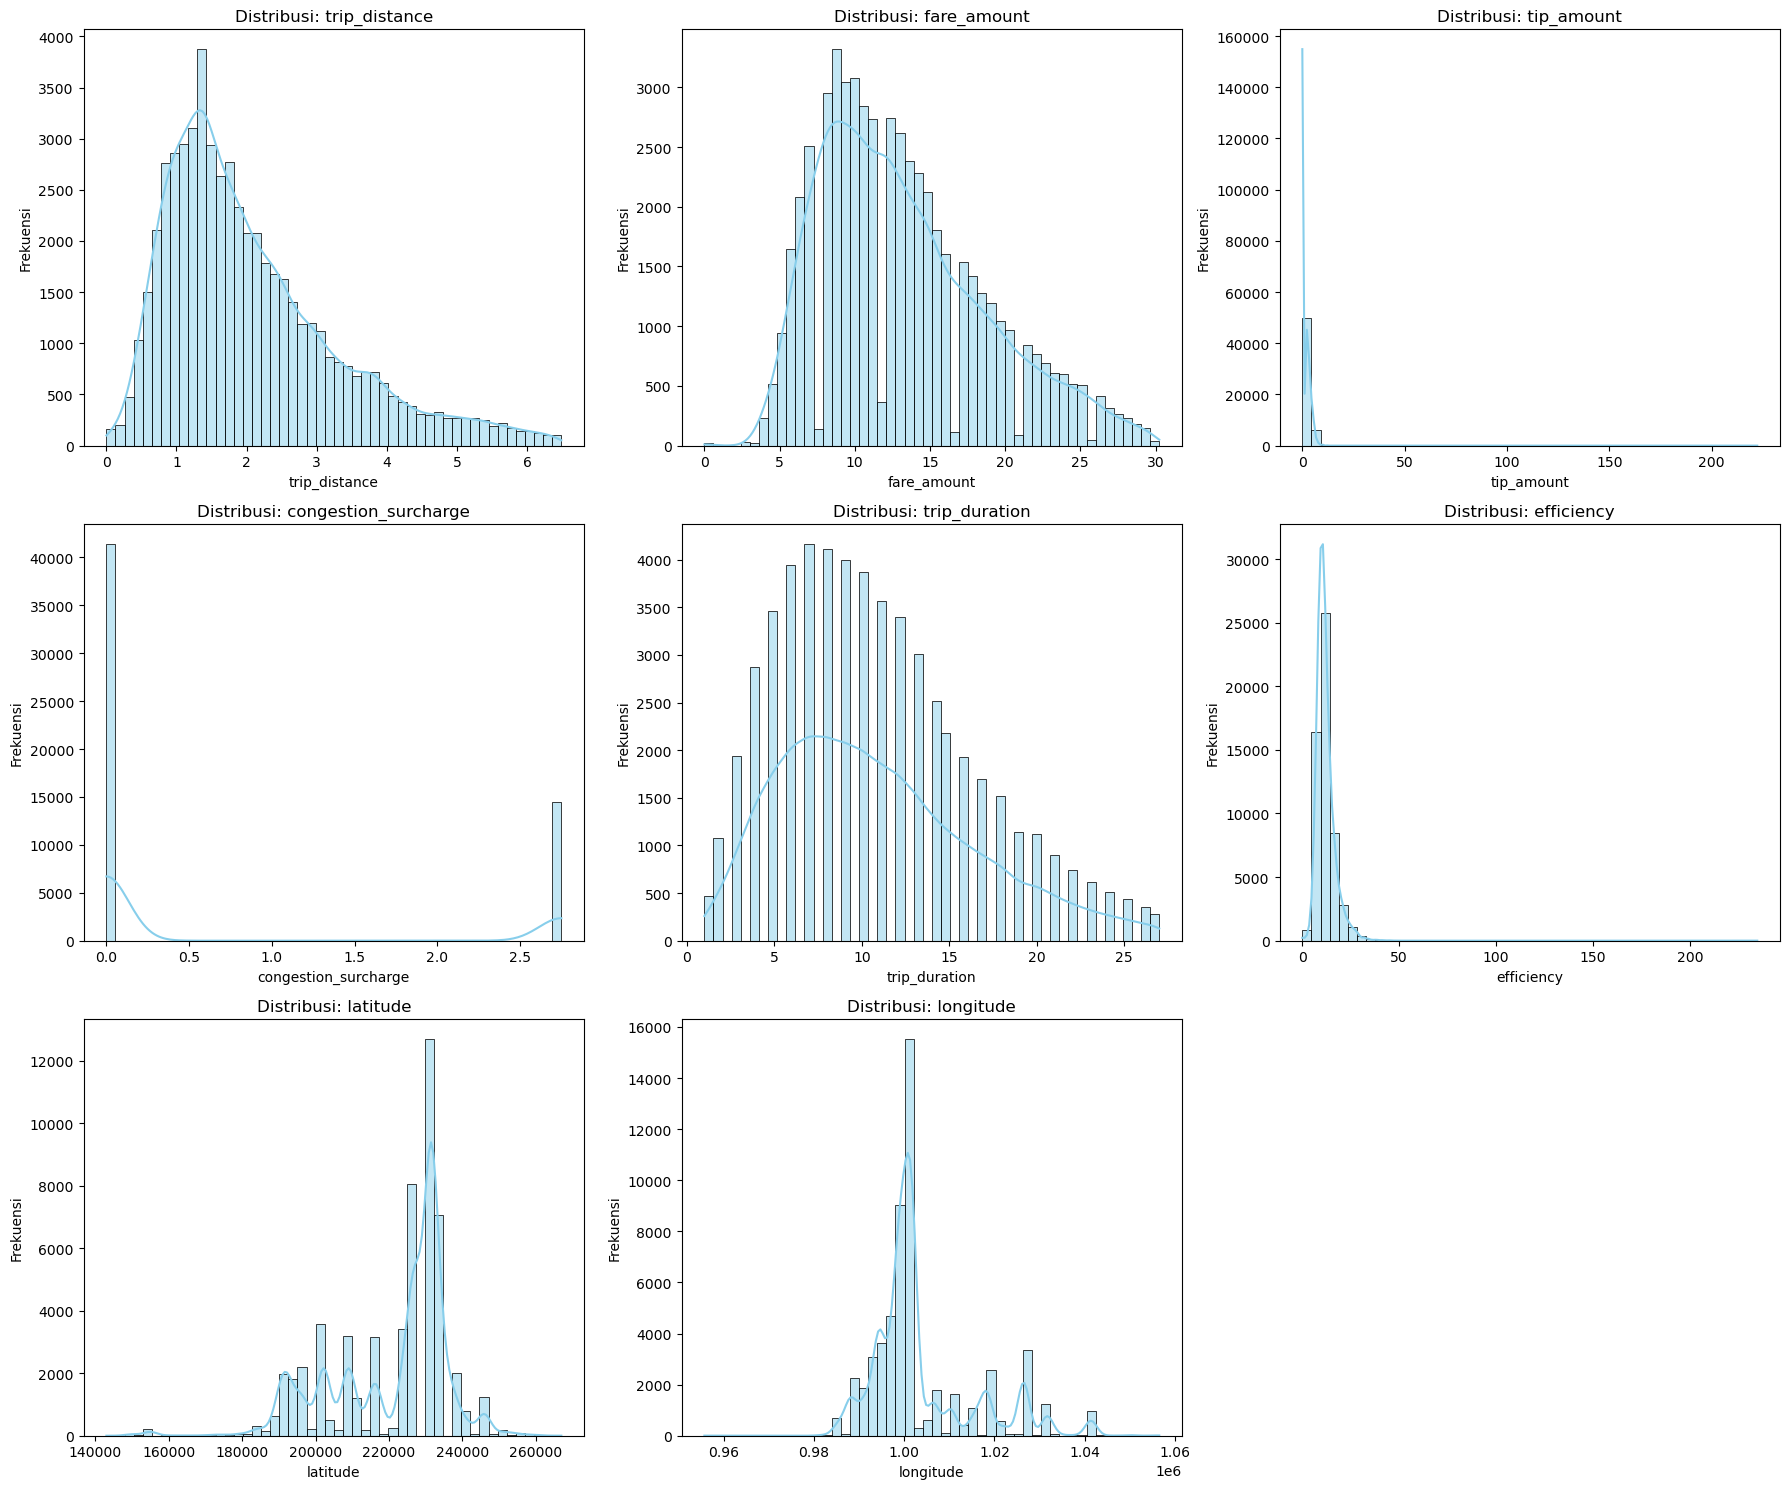

In [273]:
plt.figure(figsize=(18, 15))
for i, data in enumerate(numerikal_col):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[data], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribusi: {data}')
    plt.xlabel(data)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

insight :
- Terlihat semua data numerikal kontinu distribusi miring ke kanan (right-skewed)
- Terlihat data trip duration, fare amount dan trip distance hampir berpola seperti lonceng (terdistribusi normal)

Untuk membuktikan distribusi data yang lebih jelas maka akan diuji secara statistik. Data akan diuji dengan metode D'Agostino and Pearson's Test karena merupakan sample besar (n>50)

Hypotesis:
- H0: Data terdistribusi normal
- H1: Data tidak terdistribusi normal

Kesimpulan:
- pvalue>0.05-->gagal menolak H0-->Data terdistribusi normal
- pvalue<0.05-->berhasil menolak H0-->Data tidak terdistribusi normal

In [274]:
cart={'Data':[],
      'P-value':[],
      'Distribusi':[]}

In [275]:
for data in df.columns:
    if df[data].dtype == 'float64':
        stats, pvalue=normaltest(df[data])
        if pvalue>=0.05:
            status='Normal'
            cart['Data'].append(data)
            cart['P-value'].append(pvalue)
            cart['Distribusi'].append(status)
    
        else:
            status='Tidak Normal'
            cart['Data'].append(data)
            cart['P-value'].append(pvalue)
            cart['Distribusi'].append(status)
    else:
        continue


In [276]:
datanorm=pd.DataFrame(cart)
datanorm=datanorm.sort_values(by='P-value', ascending=False)
datanorm

,Data,P-value,Distribusi
0,trip_distance,0.0,Tidak Normal
1,fare_amount,0.0,Tidak Normal
2,tip_amount,0.0,Tidak Normal
3,congestion_surcharge,0.0,Tidak Normal
4,trip_duration,0.0,Tidak Normal
5,efficiency,0.0,Tidak Normal
6,latitude,0.0,Tidak Normal
7,longitude,0.0,Tidak Normal


### **Volume Pemesanan Taxi**
- Membandingkan banyaknya jumlah perjalanan taksi masing-masing vendor dan persentasenya dari seluruh data

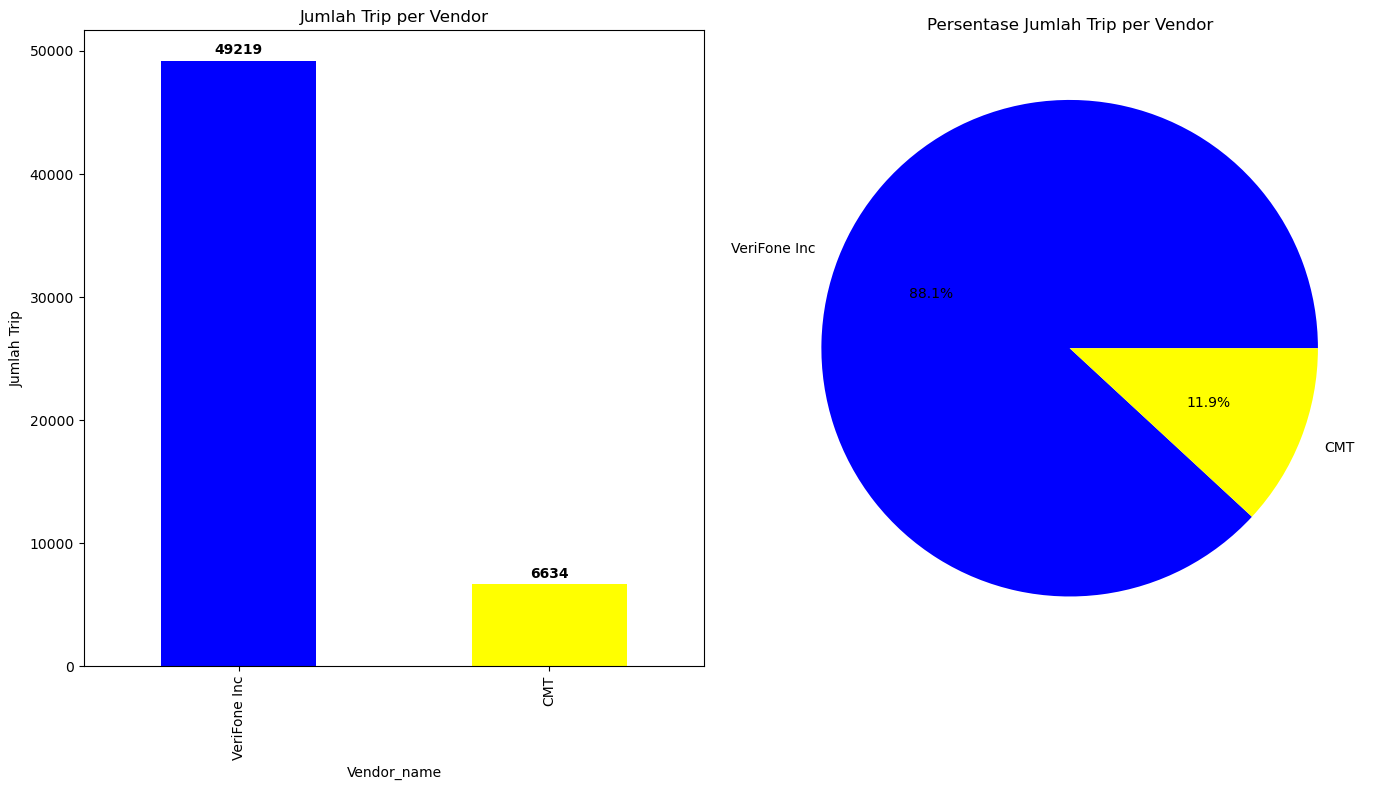

In [277]:
# Menghitung jumlah trip per vendor
trip_counts = df["Vendor_name"].value_counts()
market_share = (trip_counts / trip_counts.sum()) * 100

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Bar chart jumlah trip per vendor
trip_counts.plot(kind="bar", ax=axes[0], color=["blue", "yellow"])
axes[0].set_title("Jumlah Trip per Vendor")
axes[0].set_xlabel("Vendor_name")
axes[0].set_ylabel("Jumlah Trip")

# Menambahkan anotasi pada bar chart
for i, value in enumerate(trip_counts):
    axes[0].annotate(f'{value}',  # Nilai yang ditampilkan
                     xy=(i, value),  # Posisi teks (x, y)
                 
    xytext=(0, 5),  # Offset teks dari posisi (x, y)
                     textcoords='offset points',  # Referensi offset
                     ha='center',  # Horizontal alignment
                     fontsize=10,  # Ukuran font
                     weight='bold')  # Tebal font

# Pie chart market share
market_share.plot(kind="pie", autopct="%1.1f%%", ax=axes[1], colors=["blue", "yellow"])
axes[1].set_title("Persentase Jumlah Trip per Vendor")
axes[1].set_ylabel("")  # Menghilangkan label y agar lebih bersih

plt.tight_layout()
plt.show()

In [278]:

# Bar chart jumlah trip per vendor
trip_counts.plot(kind="bar", ax=axes[0], color=["blue", "yellow"])
axes[0].set_title("Distribusi Jumlah Trip per Vendor", fontsize=14)
axes[0].set_xlabel("Nama Vendor", fontsize=12)
axes[0].set_ylabel("Jumlah Trip", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal

# Menambahkan anotasi pada bar chart
for i, value in enumerate(trip_counts):
    axes[0].annotate(f'{value}',  # Nilai yang ditampilkan
                     xy=(i, value),  # Posisi teks (x, y)
                     xytext=(0, 5),  # Offset teks dari posisi (x, y)
                     textcoords='offset points',  # Referensi offset
                     ha='center',  # Horizontal alignment
                     va='bottom',  # Vertical alignment
                     fontsize=10, weight='bold')  # Ukuran font dan tebal

Insight :
- Berdasarkan grafik terlihat Verifone Inc lebih mendominasi berdsarkan jumlah tripnya dibanding CMT
- Dalam kurun waktu 1 bulan 90% jumlah perjalanan yang tercatat pada data adalah milik VeriFone Inc
- Dapat diasumsikan VeriFone Inc lebih diminati pengguna Taxi di New York

### **Durasi Perjalanan**
- Membandingkan durasi perjalanan masing-masing vendor untuk melihat apakah terdapat perbedaan signifikan

In [279]:
df['trip_duration'][df['Vendor_name']== 'VeriFone Inc'].median()

10.0

In [280]:
df['trip_duration'][df['Vendor_name']== 'CMT'].median()

10.0

- Membuat suatu DataFrame yang berisikan median trip duration per harinya

In [281]:
median_trip_duration = df.groupby(["Vendor_name","Date"])["trip_duration"].median().reset_index()

# Memastikan kolom 'Date' dalam format datetime
median_trip_duration['Date'] = pd.to_datetime(median_trip_duration['Date'])
median_trip_duration.head()

,Vendor_name,Date,trip_duration
0,CMT,2023-01-01,8.0
1,CMT,2023-01-02,9.0
2,CMT,2023-01-03,10.5
3,CMT,2023-01-04,10.0
4,CMT,2023-01-05,10.0


**Visualisasi Data**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\2202957038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=median_trip_duration,


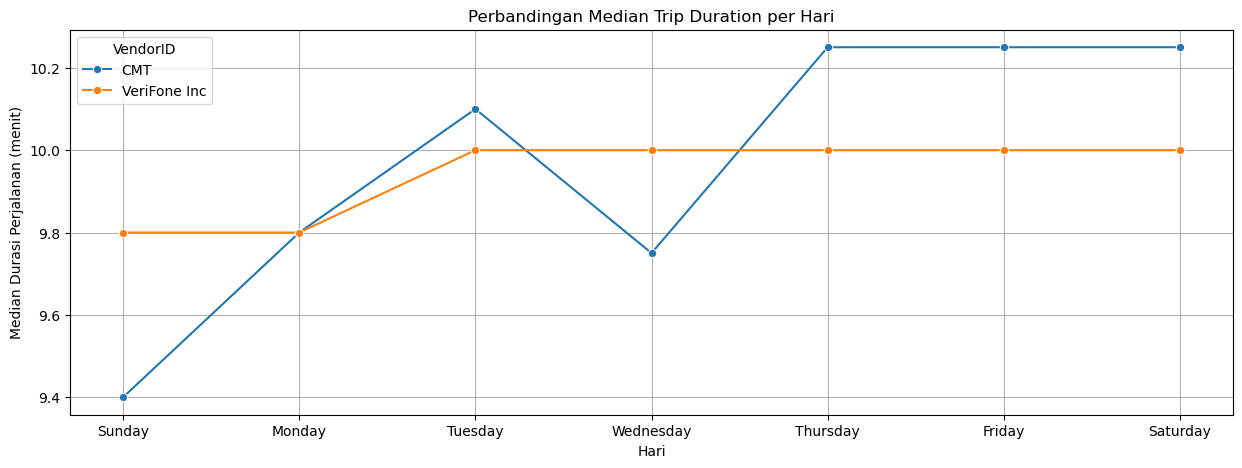

In [282]:
plt.figure(figsize=(15,5))

sns.lineplot(data=median_trip_duration, 
             x=median_trip_duration['Date'].dt.day_name(), 
             y='trip_duration',
             hue="Vendor_name", 
             marker="o",
             ci=None
             )

plt.xlabel("Hari")
plt.ylabel("Median Durasi Perjalanan (menit)")
plt.title("Perbandingan Median Trip Duration per Hari")
plt.legend(title="VendorID")
plt.grid(True)
plt.show()

insight :
- Setiap harinya durasi trip berada pada rentang 9-10 menit
- Durasi Trip dari VeriFone Inc cenderung konsisten daripada CMT
- Durasi Trip dari CMT berfluktuatif dan memuncak di hari kamis dan jumat

**Uji Statistik**

**Mann-Whitney test**

Membandingkan data trip_duration yang tidak terdistribusi normal dari 2 kelompok (CMT dan VeriFone Imc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: Trip duration dari CMT = Trip duration dari VeriFone Inc
- Ha: Trip duration dari CMT != Trip duration dari VeriFone Inc

In [283]:
stat, pvalue = mannwhitneyu(df[df['Vendor_name']=='CMT']['trip_duration'],
                            df[df['Vendor_name']=='VeriFone Inc']['trip_duration'])

pvalue

0.07993549305740637

In [284]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip duration dari CMT berbeda dengan VeriFone Inc.
          (Trip duration dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip duration dari CMT sama dengan VeriFone Inc.
          (Trip duration dari CMT dan VeriFone Inc berbeda signinfikan)''')


pvalue = 0.07993549305740637. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip duration dari CMT berbeda dengan VeriFone Inc.
          (Trip duration dari CMT dan VeriFone Inc tidak berbeda signinfikan)


Insight:
- Setelah di uji secara statistik ternyata trip duration dari masing-masing vendor tidak berbeda signifikan
- Berarti secara statistik CMT tidak lebih cepat dari VeriFone Inc ataupun sebaliknya

### **Jarak dan Efisiensi Waktunya**
Saya membagi analisis ini menjadi dua aspek utama:

- Membandingkan median jarak perjalanan per vendor

- Membandingkan efisiensi rute berdasarkan jarak tempuh per menit perjalanan 

**Mengelompokkan median trip distance berdasarkan vendor**

In [285]:
# Hitung rata-rata jarak perjalanan per vendor
med_distance = df.groupby("Vendor_name")["trip_distance"].median().reset_index().sort_values('trip_distance', ascending=False)

med_distance

,Vendor_name,trip_distance
1,VeriFone Inc,1.74
0,CMT,1.70


**Mengelompokkan median dari efficiency berdasarkan Vendor**
- Efisiensi rute diukur sebagai jumlah miles yang ditempuh per menit perjalanan.
- Semakin besar efficiency, semakin sedikit waktu yang dibutuhkan untuk menempuh jarak tertentu (alias perjalanan lebih lancar).



In [286]:
med_efficiency = df.groupby("Vendor_name")["efficiency"].median().reset_index().sort_values('efficiency', ascending=False)
med_efficiency

,Vendor_name,efficiency
1,VeriFone Inc,10.97
0,CMT,10.80


**Visualisasi Data**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3975796674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=med_distance, x="Vendor_name", y="trip_distance", palette="viridis")
C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3975796674.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=med_efficiency, x="Vendor_name", y="efficiency", palette="coolwarm")


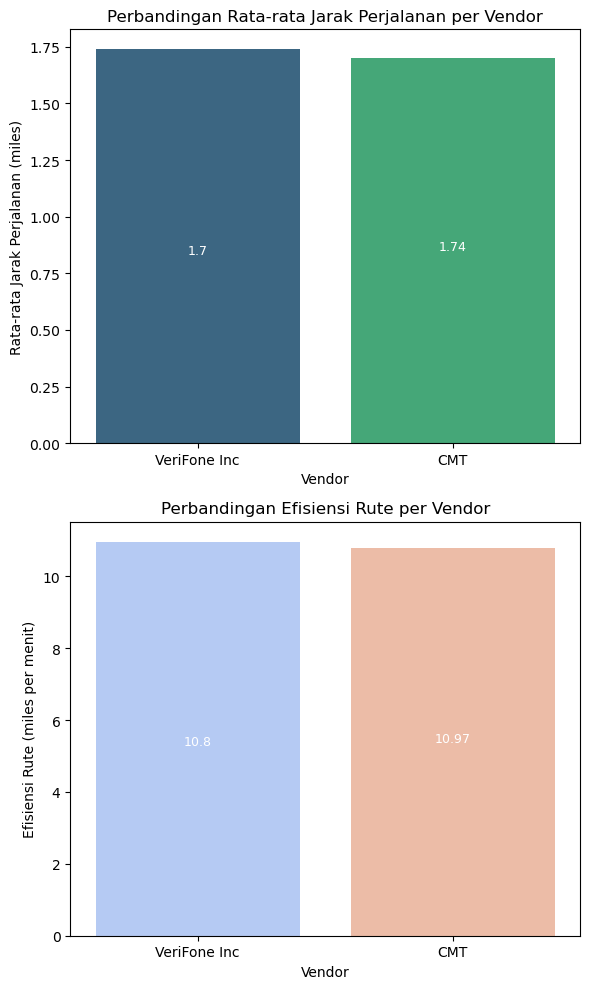

In [287]:
plt.figure(figsize=(6, 10))

# Subplot 1: Jarak Perjalanan
plt.subplot(2, 1, 1)
sns.barplot(data=med_distance, x="Vendor_name", y="trip_distance", palette="viridis")
plt.xlabel("Vendor")
plt.ylabel("Rata-rata Jarak Perjalanan (miles)")
plt.title("Perbandingan Rata-rata Jarak Perjalanan per Vendor")

# Annotate di dalam batang
for i, row in med_distance.iterrows():
    plt.text(i, row["trip_distance"] * 0.5,  # posisi teks di tengah bar
             round(row["trip_distance"], 2),
             ha='center', va='center', color='white', fontsize=9)

# Subplot 2: Efisiensi Rute
plt.subplot(2, 1, 2)
sns.barplot(data=med_efficiency, x="Vendor_name", y="efficiency", palette="coolwarm")
plt.xlabel("Vendor")
plt.ylabel("Efisiensi Rute (miles per menit)")
plt.title("Perbandingan Efisiensi Rute per Vendor")

# Annotate di dalam batang
for i, row in med_efficiency.iterrows():
    plt.text(i, row["efficiency"] * 0.5,
             round(row["efficiency"], 3),
             ha='center', va='center', color='white', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\534626060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=med_distance, x="Vendor_name", y="trip_distance", palette="viridis")
C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\534626060.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=med_efficiency, x="Vendor_name", y="efficiency", palette="coolwarm")


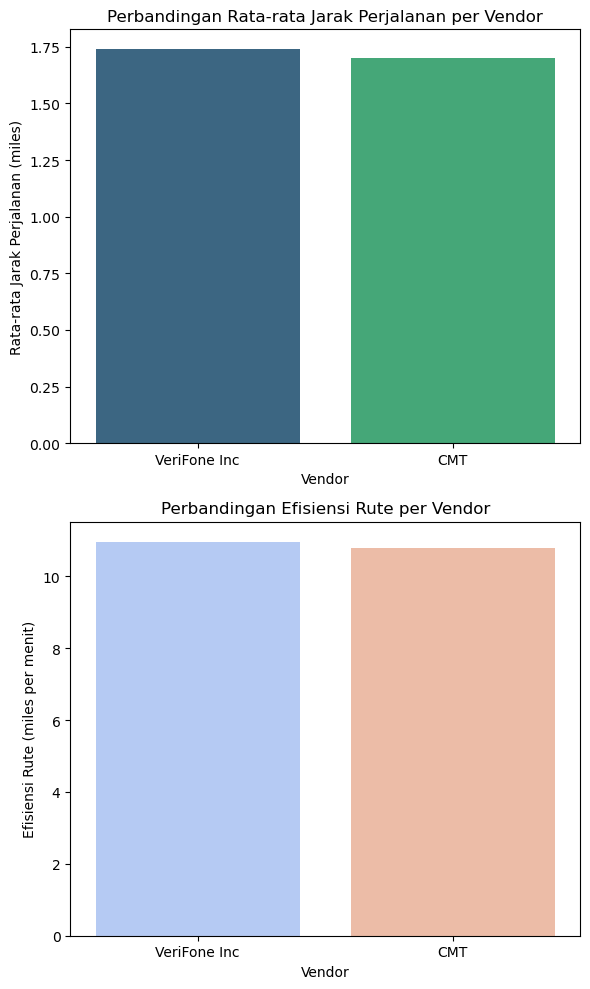

In [288]:

plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
sns.barplot(data=med_distance, x="Vendor_name", y="trip_distance", palette="viridis")
plt.xlabel("Vendor")
plt.ylabel("Rata-rata Jarak Perjalanan (miles)")
plt.title("Perbandingan Rata-rata Jarak Perjalanan per Vendor")

plt.subplot(2,1,2)
sns.barplot(data=med_efficiency, x="Vendor_name", y="efficiency", palette="coolwarm")
plt.xlabel("Vendor")
plt.ylabel("Efisiensi Rute (miles per menit)")
plt.title("Perbandingan Efisiensi Rute per Vendor")

plt.tight_layout()
plt.show()

insight:
- VeriFone Inc terlihat memiliki jarak perjalanan lebih panjang namun tidak terlihat signifikan.
- VeriFone Inc juga memiliki efisiensi rute lebih tinggi, berarti pengemudi mereka lebih sering mengambil rute yang lebih optimal untuk sampai ke tujuan namun tidak terihat signifikan juga

**Uji Statistik**

**Mann-Whitney test**

Membandingkan data **trip distance** yang tidak terdistribusi normal dari 2 kelompok (CMT dan VeriFone Imc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: Trip Distance dari CMT = Median Trip Distance dari VeriFone Inc
- Ha: Trip Distance dari CMT != Median Trip Distance dari VeriFone Inc

In [289]:
stat, pvalue = mannwhitneyu(df[df['Vendor_name']=='CMT']['trip_distance'],
                            df[df['Vendor_name']=='VeriFone Inc']['trip_distance'])

pvalue

0.40669813460946047

In [290]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip distance dari CMT berbeda dengan VeriFone Inc.
          (Trip distance dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip distance dari CMT sama dengan VeriFone Inc.
          (Trip distance dari CMT dan VeriFone Inc berbeda signinfikan)''')


pvalue = 0.40669813460946047. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan Trip distance dari CMT berbeda dengan VeriFone Inc.
          (Trip distance dari CMT dan VeriFone Inc tidak berbeda signinfikan)


insight:
- Secara Statistik ternyata Trip distance dari CMT dan VeriFone Inc tidak berbeda signinfikan
- Berarti dapat diasumsikan tidak ada kecenderungan pelanggan untuk memilih taxi berdasarkan jarak dari tujuan mereka

**Mann-Whitney test**

Membandingkan data **Efficiency** yang tidak terdistribusi normal dari 2 kelompok (CMT dan VeriFone Imc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: Efficiency dari CMT = Median Efficiency dari VeriFone Inc
- Ha: Efficiency dari CMT != Median Efficiency dari VeriFone Inc

In [291]:
stat, pvalue = mannwhitneyu(df[df['Vendor_name']=='CMT']['efficiency'],
                            df[df['Vendor_name']=='VeriFone Inc']['efficiency'])

pvalue

2.125262832010111e-05

In [292]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan efficiency dari CMT berbeda dengan VeriFone Inc.
          (efficiency dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan efficiency dari CMT sama dengan VeriFone Inc.
          (efficiency dari CMT dan VeriFone Inc berbeda signinfikan)''')

pvalue = 2.125262832010111e-05. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan efficiency dari CMT sama dengan VeriFone Inc.
          (efficiency dari CMT dan VeriFone Inc berbeda signinfikan)


insight:
- Secara Statistik efficiency dari CMT dan VeriFone Inc berbeda signinfikan
- Dengan demikian dapat diasumsikan bahwa VeriFone Inc cenderung memilih rute yang optimal di setiap perjalanan
- Hal ini juga kemungkinan menjadi faktor Verifone Inc lebih diminati daripada CMT

### **Cakupan Area**
- membandingkan area berdasarkan jumlah titik pick up dan drop off masing-masing vendor

In [293]:
totalArea=df.groupby('Vendor_name')[['zone']].nunique().sort_values('zone', ascending=False).reset_index()
totalArea

,Vendor_name,zone
0,VeriFone Inc,173
1,CMT,113


**Data Visualisasi**

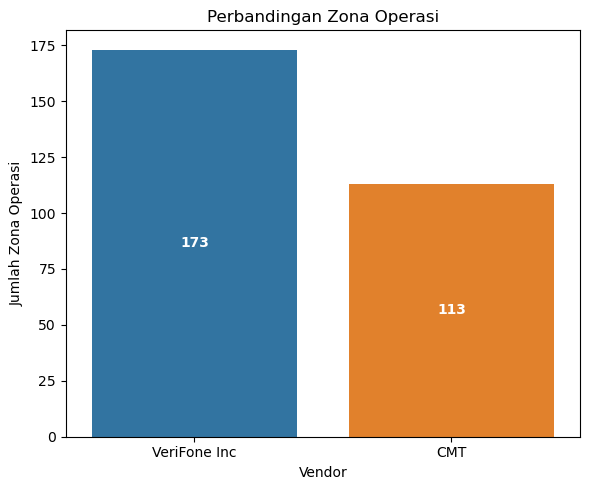

In [294]:
plt.figure(figsize=(6, 5))

sns.barplot(data=totalArea, x='Vendor_name', y='zone', hue='Vendor_name', dodge=False)
plt.xlabel("Vendor")
plt.ylabel("Jumlah Zona Operasi")
plt.title("Perbandingan Zona Operasi")

# Tambahkan annotate di dalam batang
for i, row in totalArea.iterrows():
    plt.text(i, row['zone'] * 0.5,  # Posisi teks di tengah bar
             str(row['zone']),
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Insight:
- Telihat bahwa zona operasi dari VeriFone Inc yang lebih banayk daripada CMT
- Hal ini kemungkinan juga yang menyebabkan VeriFone Inc lebih diminati daripada CMT

**Melihat jumlah penumpang dari zona operasional yang tidak dimiliki CMT**

In [295]:
# Pisahkan data berdasarkan vendor
verifone = df[df['Vendor_name'] == 'VeriFone Inc']
cmt = df[df['Vendor_name'] == 'CMT']

# 2. Ambil zona unik dari masing-masing vendor
verifone_zones = set(verifone['zone'].unique())
cmt_zones = set(cmt['zone'].unique())

# 3. Cari zona yang hanya ada di VeriFone
zona_khas_verifone = verifone_zones - cmt_zones

df_khas_varifone=df[df['zone'].isin(zona_khas_verifone)].drop_duplicates()
df_khas_varifone['zone'].unique()



array(['Long Island City/Queens Plaza', 'Briarwood/Jamaica Hills',
       'Hammels/Arverne', 'Murray Hill-Queens', 'Highbridge',
       'Morrisania/Melrose', 'Flushing Meadows-Corona Park',
       'Bushwick South', 'Richmond Hill', 'Whitestone', 'Yorkville East',
       'Woodhaven', 'South Jamaica', 'Greenwich Village South',
       'Jamaica Estates', 'Sunset Park East', 'Eastchester', 'Hollis',
       'Breezy Point/Fort Tilden/Riis Beach',
       'Schuylerville/Edgewater Park', 'Saint George/New Brighton',
       'Hillcrest/Pomonok', 'Bayside', 'Soundview/Castle Hill',
       'College Point', 'Maspeth', 'Auburndale', 'Manhattan Valley',
       'Springfield Gardens South', 'South Williamsburg',
       'University Heights/Morris Heights', 'Pelham Parkway',
       'Sunset Park West', 'Inwood Hill Park', 'Allerton/Pelham Gardens',
       'Fresh Meadows', 'Stapleton', 'Willets Point',
       'Saint Michaels Cemetery/Woodside', 'Borough Park', 'Glendale',
       'LaGuardia Airport', 'Riverd

- Total penumpang pada zona khas Veri Fone Inc

In [296]:
df_khas_varifone['passenger_count'].sum()

604

- Top 5 jumlah penumpang dari zona khas

In [297]:
df_khas_varifone.groupby('zone')[['passenger_count']].sum().sort_values('passenger_count', ascending=False).head()

,passenger_count
zone,
Long Island City/Queens Plaza,117
Bushwick South,45
Morrisania/Melrose,36
Maspeth,34
Sunset Park East,29


In [298]:
df['passenger_count'].sum()

73145

insight:
- Dari total 70rb lebih jumlah penumpang pada data, zona khas dari verifone hanya memperoleh 604 penumpang
- Dengan demikian CMT sebaiknya belum perlu untuk melakukan ekspansi pada daerah tersebut, serta lebih memfokuskan armada pada zona oprasional saat ini

### **Tarif Perjalanan**
- Membandingkan tarif yang dikenakan masing-masing vendor

In [299]:
#Membuat kolom per jarak (jauh, sedang, dekat)
jarakTarif=df.groupby(['Vendor_name','distance_range'])[['fare_amount']].median().reset_index().sort_values('fare_amount', ascending=False)

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\2988260939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jarakTarif=df.groupby(['Vendor_name','distance_range'])[['fare_amount']].median().reset_index().sort_values('fare_amount', ascending=False)


**Visualisasi Data**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3592651755.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=jarakTarif, x='distance_range', y='fare_amount', hue='Vendor_name', ci=None)


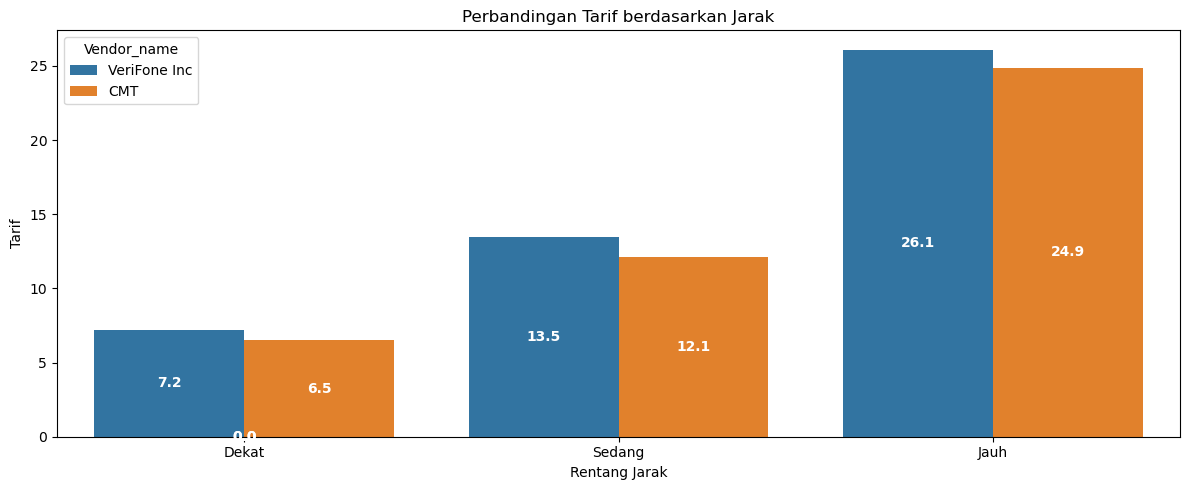

In [300]:
plt.figure(figsize=(12, 5))

# Plot barplot
ax = sns.barplot(data=jarakTarif, x='distance_range', y='fare_amount', hue='Vendor_name', ci=None)

plt.xlabel("Rentang Jarak")
plt.ylabel("Tarif")
plt.title("Perbandingan Tarif berdasarkan Jarak")

# Tambahkan anotasi di dalam bar
for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = height * 0.5  # Posisi tengah dalam bar
    ax.annotate(f'{height:.1f}',
                (x_pos, y_pos),
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


insight:
- Pada setiap rentang jarak veriFone Inc cenderung memasang tarif yang lebih tinggi dari CMT
- Perbedaan tarif yang dikenakan oleh VerFone Inc dan CMT terlihat tidak berbeda signifikan

**Uji Statistik**

**Mann-Whitney test**

Membandingkan data **fare_amount** yang tidak terdistribusi normal dari 2 kelompok (CMT dan VeriFone Inc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: fare_amount dari CMT = Median fare_amount dari VeriFone Inc
- Ha: fare_amount dari CMT != Median fare_amount dari VeriFone Inc

In [301]:
stat, pvalue = mannwhitneyu(df[df['Vendor_name']=='CMT']['fare_amount'],
                            df[df['Vendor_name']=='VeriFone Inc']['fare_amount'])

pvalue

1.618306771459495e-54

In [302]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan fare_amount dari CMT berbeda dengan VeriFone Inc.
          (fare_amount dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan fare_amount dari CMT sama dengan VeriFone Inc.
          (fare_amount dari CMT dan VeriFone Inc berbeda signinfikan)''')

pvalue = 1.618306771459495e-54. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan fare_amount dari CMT sama dengan VeriFone Inc.
          (fare_amount dari CMT dan VeriFone Inc berbeda signinfikan)


insight:
- Uji statistik membuktikan bahwa tarif yang dikenakan (fare_amount) VeriFone Inc dan CMT berbeda signifikan
- Tarif yang dikenakan VeriFone Inc lebih mahal dari CMT namun mayoritas orang di NewYork tetap memilih menggunkanan VeriFone Inc daripada CMT

### **Berdasarkan Tujuan Penumpang**
- Membandingkan rasio penumpang berdasarkan tujuannya untuk melihat apakah ada kecenderungan memilih vendor berdasarkan tujuan
- Akan dipilih 5 top lokasi drop off sebagai samplenya

In [303]:
top5do = df.groupby('DOLocationID')[['passenger_count']].sum().sort_values('passenger_count', ascending=False).head()
top5do

,passenger_count
DOLocationID,
75,4493
74,4248
236,3435
41,3316
166,2925


In [304]:
top5do=top5do['passenger_count'].index.to_list()
top5do

[75, 74, 236, 41, 166]

In [305]:
top_drop_CMT = df[(df['Vendor_name']=='CMT')&(df['DOLocationID'].isin(top5do))]
top_drop_CMT=top_drop_CMT.groupby(['Vendor_name','DOLocationID'])[['passenger_count']].sum().sort_values('passenger_count', ascending=False)
top_drop_CMT['ratio']=top_drop_CMT['passenger_count'].apply(lambda x : round(x/top_drop_CMT['passenger_count'].sum()*100, 2))
top_drop_CMT    

passenger_count  ratio
Vendor_name DOLocationID                        
CMT         75                        610  27.71
            74                        442  20.08
            236                       431  19.58
            166                       363  16.49
            41                        355  16.13

In [306]:
top_drop_VF = df[(df['Vendor_name']=='VeriFone Inc')&(df['DOLocationID'].isin(top5do))]
top_drop_VF=top_drop_VF.groupby(['Vendor_name','DOLocationID'])[['passenger_count']].sum().sort_values('passenger_count', ascending=False)
top_drop_VF['ratio']=top_drop_VF['passenger_count'].apply(lambda x : round(x/top_drop_VF['passenger_count'].sum()*100, 2))
top_drop_VF  

passenger_count  ratio
Vendor_name  DOLocationID                        
VeriFone Inc 75                       3883  23.95
             74                       3806  23.47
             236                      3004  18.52
             41                       2961  18.26
             166                      2562  15.80

In [307]:
do_compare=pd.concat([top_drop_CMT,top_drop_VF])
do_compare

passenger_count  ratio
Vendor_name  DOLocationID                        
CMT          75                        610  27.71
             74                        442  20.08
             236                       431  19.58
             166                       363  16.49
             41                        355  16.13
VeriFone Inc 75                       3883  23.95
             74                       3806  23.47
             236                      3004  18.52
             41                       2961  18.26
             166                      2562  15.80

In [308]:
do_compare=do_compare.pivot_table(index='Vendor_name', columns='DOLocationID', values='ratio')
do_compare

DOLocationID,41,74,75,166,236
Vendor_name,,,,,
CMT,16.13,20.08,27.71,16.49,19.58
VeriFone Inc,18.26,23.47,23.95,15.80,18.52


**Data Visualisasi**

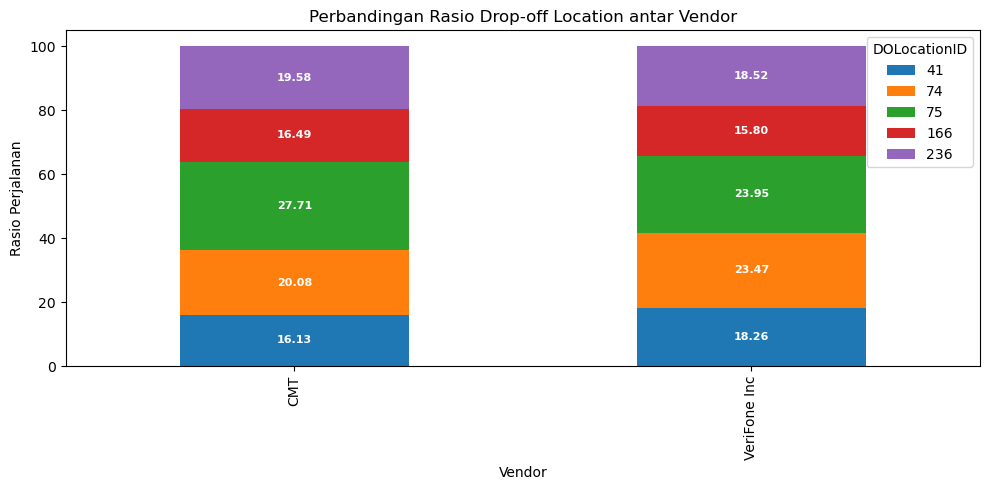

In [309]:
# Buat plot
ax = do_compare.plot(kind='bar', stacked=True, figsize=(10, 5))

# Loop tiap bar dan tambahkan annotate
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Supaya tidak mengannotasi bar kosong
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f'{height:.2f}', ha='center', va='center',
                    color='white', fontsize=8, fontweight='bold')

plt.xlabel("Vendor")
plt.ylabel("Rasio Perjalanan")
plt.title("Perbandingan Rasio Drop-off Location antar Vendor")
plt.tight_layout()
plt.show()


Insight:
- Berdasarkan grafik terlihat bahwa proporsi penumpang pada top 5 DOLocationID tidak berbeda signifikan
- Dengan demikian dapat dikatakan bahwa penumpang tidak memiliki kecenderungan memilih taksi berdasarkan lokasi yang ingin dituju

**Uji Statistik**

**Chi-Square Test**

-> Menguji keterkaitan antara top 5 drop off location terhadap rasio penumpang masing-masing vendor

Hypotheses:
- Ho: Rasio penumpang pada top 5 DOLocationID tidak memiliki keterkaitan terhadap Vendor (proporsinya sama)
- Ha: Rasio penumpang pada top 5 DOLocationID penumpang CMT memiliki keterkaitan Vendor (proporsinya berbeda)

In [310]:
stats, pvalue, dof, expected = chi2_contingency(do_compare)

pvalue

0.9496276271304981

In [311]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa Rasio penumpang pada top 5 DOLocationID memiliki keterkaitan dengan Vendor.
          (Proporsinya tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita punya cukup bukti untuk mengatakan bahwa Rasio penumpang pada top 5 DOLocationID memiliki keterkaitan dengan Vendor.
          (Proporsinya berbeda signinfikan)''')

pvalue = 0.9496276271304981. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa Rasio penumpang pada top 5 DOLocationID memiliki keterkaitan dengan Vendor.
          (Proporsinya tidak berbeda signinfikan)


Insight:
- Secara statistik top 5 lokasi tujuan penumpang (DOLocationID) memiliki proporsi yang sama
- Ini berarti pola distribusi drop-off antara vendor relatif sama atau dengan kata lain tidak ada kecenderungan pelanggan untuk memilih taxi berdasarkan tujuan Drop Off mereka

### **Area Dengan Jumlah Penumpang Terbanyak**
- Kedua Vendor merupakan taksi offline maka dari itu untuk mendapat penumpang taksi harus beroprasi pada area potensial calon penumpang berada
- Dengan membandingkan persentase penumpang yang di peroleh masing-masing vendor pada suatu area, kita dapat mengetahui area operasi dari taksinya

- Top 5 lokasi Penjemputan

In [312]:
top5 = df.groupby('PULocationID')[['passenger_count']].sum().sort_values('passenger_count', ascending=False).head()
top5

,passenger_count
PULocationID,
74,15960
75,11199
166,4584
41,4583
95,4318


- Filter data dengan top 5 lokasi teratas dan mengelompokkannya dengan masing-masing vendor serta rasio jumlah penumpangnya

In [313]:
top5=top5['passenger_count'].index.to_list()
top5

[74, 75, 166, 41, 95]

In [314]:
# Filter hanya data dengan lokasi pickup di 5 teratas
top_pick_CMT = df[(df['Vendor_name']=='CMT')&(df['PULocationID'].isin(top5))]
top_pick_CMT=top_pick_CMT.groupby(['Vendor_name','PULocationID'])[['passenger_count']].sum().sort_values('passenger_count', ascending=False)
top_pick_CMT['ratio']=top_pick_CMT['passenger_count'].apply(lambda x : round(x/top_pick_CMT['passenger_count'].sum()*100, 2))
top_pick_CMT        


passenger_count  ratio
Vendor_name PULocationID                        
CMT         74                       2457  53.75
            75                       1198  26.21
            166                       463  10.13
            41                        381   8.34
            95                         72   1.58

In [315]:
top_pick_VF = df[(df['Vendor_name']=='VeriFone Inc')&(df['PULocationID'].isin(top5))]
top_pick_VF=top_pick_VF.groupby(['Vendor_name','PULocationID'])[['passenger_count']].sum().sort_values('passenger_count', ascending=False)
top_pick_VF['ratio']=top_pick_VF['passenger_count'].apply(lambda x : round(x/top_pick_VF['passenger_count'].sum()*100, 2))
top_pick_VF

passenger_count  ratio
Vendor_name  PULocationID                        
VeriFone Inc 74                      13503  37.43
             75                      10001  27.72
             95                       4246  11.77
             41                       4202  11.65
             166                      4121  11.42

In [316]:
compare=pd.concat([top_pick_CMT, top_pick_VF])
compare

passenger_count  ratio
Vendor_name  PULocationID                        
CMT          74                       2457  53.75
             75                       1198  26.21
             166                       463  10.13
             41                        381   8.34
             95                         72   1.58
VeriFone Inc 74                      13503  37.43
             75                      10001  27.72
             95                       4246  11.77
             41                       4202  11.65
             166                      4121  11.42

In [317]:
compare_c=compare.pivot_table(index='Vendor_name', columns='PULocationID', values='ratio')
compare_c

PULocationID,41,74,75,95,166
Vendor_name,,,,,
CMT,8.34,53.75,26.21,1.58,10.13
VeriFone Inc,11.65,37.43,27.72,11.77,11.42


**Visualisasi Data**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\2207331604.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=compare, x='PULocationID', y='ratio', hue='Vendor_name',


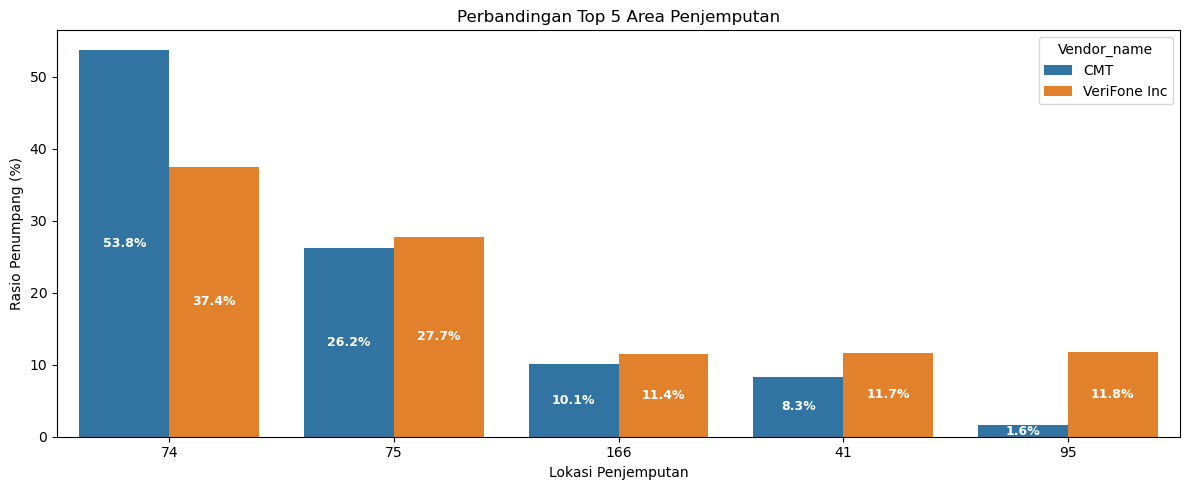

In [318]:
plt.figure(figsize=(12, 5))

# Buat barplot
ax = sns.barplot(data=compare, x='PULocationID', y='ratio', hue='Vendor_name',
                 ci=None, order=top5)

plt.xlabel("Lokasi Penjemputan")
plt.ylabel("Rasio Penumpang (%)")
plt.title("Perbandingan Top 5 Area Penjemputan")

# Tambahkan annotate di dalam bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = height * 0.5  # Tengah batang
        ax.annotate(f'{height:.1f}%', (x, y),
                    ha='center', va='center',
                    color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


In [319]:
df['zone'][df['LocationID']==74].unique()

array(['East Harlem North'], dtype=object)

In [320]:
df['borough'][df['LocationID']==74].unique()

array(['Manhattan'], dtype=object)

Insight:
- Ratio penumpang tertinggi diperoleh CMT yaitu di lokasi 74 sekitar 50% lokasi tersebut adalah zona East Harlem North pada kota Manhattan.
- Namun pada lokasi penjemputan lainnya VeriFone Inc memiliki rasio perolehan penumpang lebih tinggi
- Kejadian ini kemungkinan dapat terjadi akibat driver dari CMT cenderung hanya beroprasi di lokasi favorit calon penumpang saja, sedangkan VeriFone Inc lebih menyebar.

**Melihat sebaran penumpang berdasarkan kota**

In [321]:
df.groupby('borough')[['passenger_count']].sum().sort_values('passenger_count', ascending=False)

,passenger_count
borough,
Manhattan,46202
Queens,17908
Brooklyn,8233
Bronx,790
Staten Island,12


**Melihat sebaran penumpang CMT pada suatu kota**

In [322]:
dfborCMT=df[df['Vendor_name']=='CMT'].groupby('borough')[['passenger_count']].sum().sort_values('passenger_count', ascending=False)
dfborCMT['percentage']=dfborCMT['passenger_count'].apply(lambda x : round(x/dfborCMT['passenger_count'].sum()*100, 2))
dfborCMT

,passenger_count,percentage
borough,,
Manhattan,5365,69.68
Brooklyn,1480,19.22
Queens,735,9.55
Bronx,120,1.56


- Ternyata 70% penumpang yang diperoleh dareah CMT berasal dari kota Manhattan
- Dengan demikian CMT dapat mengarahkan drivernya agar beroprasi lebih menyerbar di kota lainnya

### **Kepuasan Pelanggan**
- Melihat perbandingan kepuasan pelanggan berdasarkan tip yang diperoleh masing-masing vendor

In [323]:
# Hitung rata-rata tip per vendor
median_tip_per_vendor = df.groupby("Vendor_name")["tip_amount"].median().reset_index().sort_values('tip_amount', ascending=False)

median_tip_per_vendor

,Vendor_name,tip_amount
1,VeriFone Inc,1.75
0,CMT,1.70


**Data Visualisasi**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3512772375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=median_tip_per_vendor, x="Vendor_name", y="tip_amount", palette="viridis")


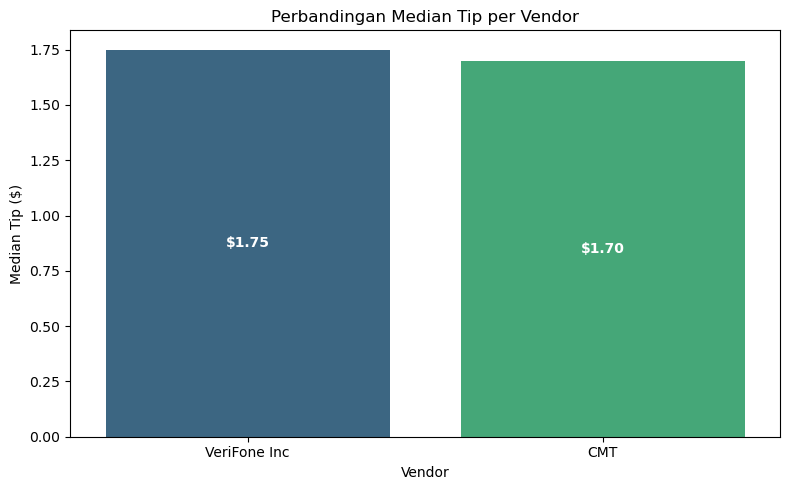

In [324]:
# Visualisasi dengan anotasi
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=median_tip_per_vendor, x="Vendor_name", y="tip_amount", palette="viridis")

plt.xlabel("Vendor")
plt.ylabel("Median Tip ($)")
plt.title("Perbandingan Median Tip per Vendor")

# Tambahkan annotate di dalam bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = height * 0.5  # tengah batang
        ax.annotate(f"${height:.2f}", (x, y),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


insight:
- Terlihat bahwa median tip yang diberikan pelanggan ke VeriFone Inc lebih besar daripada CMT
- Namun secara grafik perbedaannya tidak terlihat signifikan

**Uji Statistik**

**Mann-Whitney test**

Membandingkan data **tip_amount** yang tidak terdistribusi normal dari 2 kelompok (CMT dan VeriFone Inc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: Median tip_amount dari CMT = Median tip_amount dari VeriFone Inc
- Ha: Median tip_amount dari CMT != Median tip_amount dari VeriFone Inc

In [325]:
stat, pvalue = mannwhitneyu(df[df['Vendor_name']=='CMT']['tip_amount'],
                            df[df['Vendor_name']=='VeriFone Inc']['tip_amount'])

pvalue

0.0011091414290609616

In [326]:
# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan tip_amount dari CMT berbeda dengan VeriFone Inc.
          (tip_amount dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan tip_amount dari CMT sama dengan VeriFone Inc.
          (tip_amount dari CMT dan VeriFone Inc berbeda signinfikan)''')

pvalue = 0.0011091414290609616. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan tip_amount dari CMT sama dengan VeriFone Inc.
          (tip_amount dari CMT dan VeriFone Inc berbeda signinfikan)


insight :
- Ternyata secara statistik tip yang diberikan pelanggan ke VeriFone Inc tidak lebih besar signifikan dibanding CMT
- Dengan demikian dapat diasumsikan secara kualitas pelayanan dari CMT tidak kalah dari VeriFone Inc

### **Berdasarkan Waktu (Dini Hari, Pagi, Siang, Sore, Malam)**
- Membandingkan rasio perolehan penumpang masing-masing vendor berdasarkan waktu, untuk melihat apakah ada kecenderungan pelanggan memilih taksi berdasarkan waktu

Mengelompokkan data berdasarkan rasionya

In [327]:
CMT_waktu=df[df['Vendor_name']=='CMT'].groupby(['Vendor_name','waktu'])[['passenger_count']].sum()
CMT_waktu['ratio']=CMT_waktu['passenger_count'].apply(lambda x : round(x/CMT_waktu['passenger_count'].sum()*100, 2))
CMT_waktu

passenger_count  ratio
Vendor_name waktu                            
CMT         Dini Hari              337   4.38
            Malam                 1166  15.14
            Pagi                  1769  22.97
            Siang                 2019  26.22
            Sore                  2409  31.29

In [328]:
VF_waktu=df[df['Vendor_name']=='VeriFone Inc'].groupby(['Vendor_name','waktu'])[['passenger_count']].sum()
VF_waktu['ratio']=VF_waktu['passenger_count'].apply(lambda x : round(x/VF_waktu['passenger_count'].sum()*100, 2))
VF_waktu

passenger_count  ratio
Vendor_name  waktu                            
VeriFone Inc Dini Hari             3425   5.23
             Malam                13519  20.66
             Pagi                 13770  21.04
             Siang                14430  22.05
             Sore                 20301  31.02

In [329]:
time_compare=pd.concat([CMT_waktu, VF_waktu])
time_compare=time_compare.reset_index()
time_compare

,Vendor_name,waktu,passenger_count,ratio
0,CMT,Dini Hari,337,4.38
1,CMT,Malam,1166,15.14
2,CMT,Pagi,1769,22.97
3,CMT,Siang,2019,26.22
4,CMT,Sore,2409,31.29
5,VeriFone Inc,Dini Hari,3425,5.23
6,VeriFone Inc,Malam,13519,20.66
7,VeriFone Inc,Pagi,13770,21.04
8,VeriFone Inc,Siang,14430,22.05
9,VeriFone Inc,Sore,20301,31.02


**Data Visualisasi**

C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\3714422440.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=time_compare,


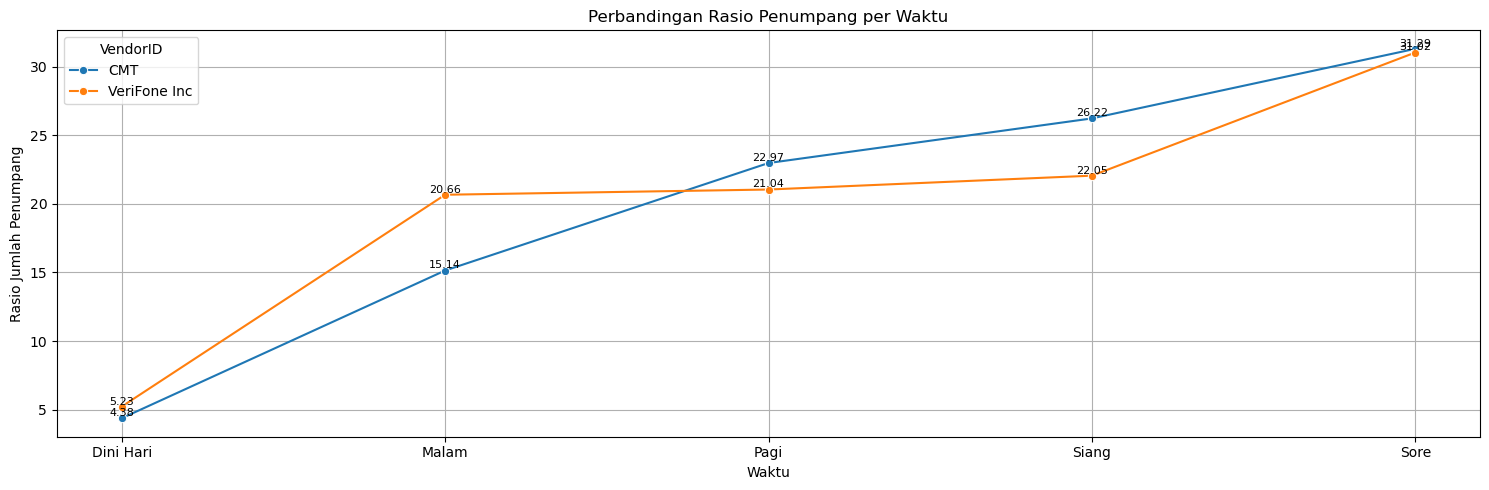

In [343]:
plt.figure(figsize=(15,5))

sns.lineplot(data=time_compare, 
             x='waktu', 
             y='ratio',
             hue="Vendor_name", 
             marker="o",
             ci=None, 
             estimator='sum',
)

# Tambahkan anotasi
for vendor in time_compare["Vendor_name"].unique():
    subset = time_compare[time_compare["Vendor_name"] == vendor]
    for x, y in zip(subset["waktu"], subset["ratio"]):
        plt.text(x, y + 0.002, f"{y:.2f}", ha='center', va='bottom', fontsize=8)

plt.xlabel("Waktu")
plt.ylabel("Rasio Jumlah Penumpang")
plt.title("Perbandingan Rasio Penumpang per Waktu")
plt.legend(title="VendorID")
plt.grid(True)
plt.tight_layout()
plt.show()


insight:
- Berdasarkan grafik terlihat rasio perolehan penumpang CMT di waktu dini hari dan malam hari lebih besar dari VeriFone Inc
- Sedangkan rasio penumpang VeriFone Inc lebih besar dari CMT pada waktu pagi, siang, sore

**Uji Statistik**

**Shapiro-Wilk Test**
- Uji normalitas untuk data sample kecil (n<50)

In [331]:
stats, pvalue=shapiro(time_compare['ratio'])
pvalue

0.21647704212665492

In [332]:
if pvalue >= 0.05:
    # Ho
    print(f"Pvalue: {pvalue}, pvalue >= 0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal.")
else:
    # Ha
    print(f"Pvalue: {pvalue}, pvalue < 0.05, artinya berhasil menolak Ho. Kita anggap data tidak terdistribusi normal.")

Pvalue: 0.21647704212665492, pvalue >= 0.05, artinya gagal menolak Ho. Kita anggap data terdistribusi normal.


**Unpaired Two Sample T-Test**

Membandingkan **Rasio penumpang per waktu** yang terdistribusi normal dari 2 kelompok (CMT dan VeriFone Inc) yang berbeda atau tidak saling berkaitan.

**Hypotheses:**
- Ho: Rasio penumpang per waktu dari CMT = Rasio penumpang per waktu dari VeriFone Inc
- Ha: Rasio penumpang per waktu dari CMT != Rasio penumpang per waktu dari VeriFone Inc

In [333]:
stats, pvalue = ttest_ind(a =time_compare[time_compare['Vendor_name']=='CMT']['ratio'],
          b =time_compare[time_compare['Vendor_name']=='VeriFone Inc']['ratio'],)

pvalue

1.0

In [334]:

# conclusion
if pvalue >= 0.05:
    # Ho
    print(f'''pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan rasio penumpang per waktu dari CMT berbeda dengan VeriFone Inc.
          (rasio penumpang per waktu dari CMT dan VeriFone Inc tidak berbeda signinfikan)''')
else:
    # Ha
    print(f'''pvalue = {pvalue}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan rasio penumpang per waktu dari CMT sama dengan VeriFone Inc.
          (rasio penumpang per waktu dari CMT dan VeriFone Inc berbeda signinfikan)''')

pvalue = 1.0. pvalue > 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan rasio penumpang per waktu dari CMT berbeda dengan VeriFone Inc.
          (rasio penumpang per waktu dari CMT dan VeriFone Inc tidak berbeda signinfikan)


Insight :
- Ternyata secara statistik rasio perolehan penumpang per waktu masing-masing vendor tidak lah berbeda signifikan
- Ini berarti pelanggan tidak memiliki kecenderungan untuk memilih suatu vendor berdasarkan waktunya

### **Persentase Kemacetan**

In [335]:
totalcust=df['Vendor_name'].value_counts().reset_index()
totalcust.rename(columns={'count':'total_passenger'}, inplace=True)
totalcust

,Vendor_name,total_passenger
0,VeriFone Inc,49219
1,CMT,6634


In [336]:
df_macet=df[df['congestion_surcharge']>0]
df_macet=df_macet.groupby('Vendor_name')[['congestion_surcharge']].count().reset_index()

df_macet=df_macet.merge(totalcust)
df_macet['percentage']=round(df_macet['congestion_surcharge']/df_macet['total_passenger']*100, 2)
df_macet

,Vendor_name,congestion_surcharge,total_passenger,percentage
0,CMT,1924,6634,29.00
1,VeriFone Inc,12542,49219,25.48


C:\Users\ngura\AppData\Local\Temp\ipykernel_9080\2149125063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_macet, x="Vendor_name", y="percentage", palette="viridis")


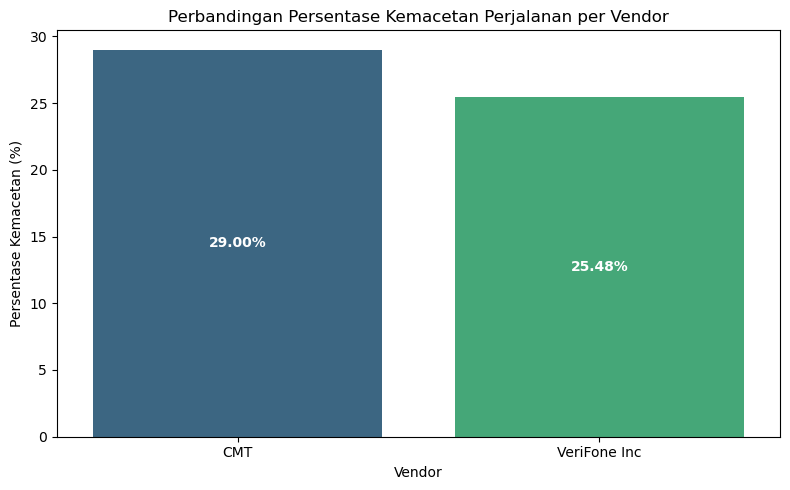

In [344]:
plt.figure(figsize=(8,5))

# Barplot
ax = sns.barplot(data=df_macet, x="Vendor_name", y="percentage", palette="viridis")

# Tambahkan anotasi di dalam bar
for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = value / 2  # Posisi teks di tengah bar
    ax.text(x, y, f"{value:.2f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.xlabel("Vendor")
plt.ylabel("Persentase Kemacetan (%)")
plt.title("Perbandingan Persentase Kemacetan Perjalanan per Vendor")
plt.tight_layout()
plt.show()



insight:
- Berdasarkan grafik persentase kemacetan dari CMT lebih besar dari VeriFone Inc
- Berarti dari seluruh penumpang yang diperoleh oleh CMT sekitar 30% nya mengalami kemacetan

In [362]:
zona_macet=df.groupby(['LocationID', 'zone'])[['congestion_surcharge']].count().sort_values('congestion_surcharge', ascending=False).head(5).reset_index()
zona_macet

,LocationID,zone,congestion_surcharge
0,74,East Harlem North,12231
1,75,East Harlem South,8058
2,41,Central Harlem,3561
3,166,Morningside Heights,3439
4,95,Forest Hills,3341


In [361]:
dfwaktumacet=df.groupby([df['Date'].dt.day_name(),'waktu'])[['congestion_surcharge']].count().reset_index()
# Ambil 2 waktu dengan kemacetan tertinggi per hari
top2_macet_per_hari = (
    dfwaktumacet.sort_values(['Date', 'congestion_surcharge'], ascending=[True, False])
    .groupby('Date')
    .head(2)
    .reset_index(drop=True)
)

top2_macet_per_hari

,Date,waktu,congestion_surcharge
0,Friday,Sore,2593
1,Friday,Pagi,1831
2,Monday,Sore,2651
3,Monday,Siang,2014
4,Saturday,Sore,2041
5,Saturday,Siang,1727
6,Sunday,Sore,1997
7,Sunday,Siang,1730
8,Thursday,Sore,2663
9,Thursday,Pagi,1960


- Berdasarkan tabel waktu macet yang terlah diperoleh driver CMT dapat menghindari zona rawan macet dengan mengikuti jadwal diatas

## **Kesimpulan dan Rekomendasi**

**Kesimpulan**

Berdasarkan analisa yang telah dilakukan diperoleh kesimpulan sebagai berikut:
- Dalam kurun waktu 1 bulan sebanyak 90% dari total data jumlah perjalanan dilakukan oleh VeriFone Inc sehingga dapat dikatakan VeriFone Inc sangat diminati penumpang taksi di New York dibanding CMT
- Berdasarkan durasi perjalanan kedua Vendor berada pada rentang 9-10 menit per harinya dan durasi trip terlama ada pada hari kamis-sabtu. Perbedaan durasi trip dari kedua vendor **tidaklah signifikan** yang berarti trip duration tidak menjadi suatu faktor yang mempengaruhi pelanggan untuk memilih taksi.
- Berdasarkan jarak perjalanan (trip distance), kedua vendor **tidak berbeda signifikan**. Berarti dapat diasumsikan tidak ada kecenderungan pelanggan untuk memilih taxi berdasarkan jarak dari tujuan mereka. 
- Secara efisiensi waktu dari VeriFone Inc berbeda signifikan dengan CMT dimana secara nilai tengah efisiensi dari VeriFone Inc lebih besar dibanding CMT. dengan demikian VeriFone Inc cenderung memilih rute yang optimal di setiap perjalanan sehingga hal ini kemungkinan menjadi faktor mengapa VeriFone Inc lebih diminati.
- Area oprasional dari VeriFone inc lebih banyak daripada CMT sehingga membuat VeriFone Inc lebih mudah diakses daripada CMT
- Tarif yang dikenakan oleh VeriFone Inc lebih mahal, namun tetap diminati oleh mayoritas penumpang
- Dari sample 5 tempat drop off paling sering dikunjungi, ternyata proporsi rasio penumpang masing-masing vendor **tidak berbeda signifikan** yang berarti, tidak ada kecenderungan pelanggan untuk memilih taxi berdasarkan tujuan Drop Off mereka
- Dari sample 5 tempat pick up penumpang terbanyak, proporsi penumpang terlihat berbeda yang berarti rasio penumpang pada suatu area pick up mempengaruhi kecenderungan pelanggan untuk memilih taxi. terlihat pada lokasi 74 rasio penumpang CMT lebih besar dari VeriFone Inc namun rasionya kalah pada area lain, Kejadian ini kemungkinan dapat terjadi akibat driver dari CMT cenderung beroprasi di lokasi favorit calon penumpang saja, sedangkan VeriFone Inc lebih menyebar.
- Berdasarkan tip yang diberikan ternyata tip dari VeriFone Inc **tidak berbeda signifikan** dengan CMT, hal ini kemungkinan terjadi karena pelayanan dari VeriFone Inc lebih baik daripada CMT sehingga harus dilakukan evaluasi kepuasan pelanggan
- Rasio perolehan penumpang dari masing-masing vendor pada suatu waktu (Dini hari, pagi, siang, sore, malam) **tidak berbeda signifikan**, yang berarti pelanggan tidak memiliki kecenderungan untuk memilih suatu vendor berdasarkan waktu
- Persentase kemacetan CMT lebih besar daripada VeriFone Inc, dimana dari seluruh penumpang yang diperoleh 30% nya mengalami kemacetan.

**Rekomendasi**

Adapun rekomendasi yang saya ajukan:
- Banyaknya jumlah perjalanan yang dilakukan oleh VeriFone Inc dibandingkan CMT kemungkinan tejadi karena VeriFone Inc lebih dikenal oleh orang-orang di New York, jadi CMT dapat melakukan pemasaran untuk meningkatkan brand awareness dari CMT, mengingat tarif dari CMT lebih murah dari VeriFone Inc.
- Efisiensi waktu dan tingkat kemacetan CMT lebih buruk dari VeriFone Inc, jadi CMT dapat mengintegrasikan sistem navigasi real-time traffic (seperti Waze atau Google Maps API) untuk membantu driver CMT menghindari kemacetan dan membuat perjalanan menjadi lebih efisien.
- Terdapat zona yang hanya terdapat di VeriFone Inc saja, namun zona tersebut sepi penumpang (kontribusi <1% dari total data). Jadi lebih baik tidak menambah armada pada daerah tersebut terlebih dahulu.
- Berdasarkan top 5 titik jemput 50 % penumpang berasal dari titik 74 , hal ini kemungkinan terjadi akibat driver dari CMT cenderung berada pada area paling potensial saja. Dengan demikian CMT dapat lebih menyebar armada lebih merata terutama pada daerah Queens dan Broklyn dimana persentase perolehannya penumpangnya berbeda jauh dari manhattan.
- Untuk mengevaluasi kepuasan pelanggan, CMT dapat menempelkan barcode yang berisi link dimana penumpang dapat mengirim kritik dan saran serta pada taksi dan menginfokan para driver agar nantinya bisa disampaikan pada penumpang.
-  Berikut zona dengan tingkat kemacetan 10 tertinggi

| Nomor | LocationID | Zone                |
|-------|------------|---------------------|
| 1     | 74         | East Harlem North   |
| 2     | 75         | East Harlem South   |
| 3     | 41         | Central Harlem      |
| 4     | 166        | Morningside Heights |
| 5     | 95         | Forest Hills        |

- Berikut jadwal waktu macet per harinya :

| Hari       | Waktu 1 | Waktu 2 |
|------------|---------|---------|
| Monday     | Sore    | Siang   |
| Tuesday    | Sore    | Pagi    |
| Wednesday  | Sore    | Pagi    |
| Thursday   | Sore    | Pagi    |
| Friday     | Sore    | Pagi    |
| Saturday   | Sore    | Siang   |
| Sunday     | Sore    | Siang   |

- Dengan demikian dirver yang mendapat pelanggan dengan tujuan zona rawan macet dapat melihat jadwal waktu macet sehingga dapat mencari zona alternatif

In [340]:
# Siapkan transformer EPSG:2263 ke WGS84
transformer = Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

# Ubah langsung nilai dalam kolom latitude dan longitude
df['longitude'], df['latitude'] = transformer.transform(df['longitude'].values, df['latitude'].values)

# Simpan ke file baru
df.to_csv('Data_Taxi_Clean.csv')

In [341]:
df['longitude'].unique()

array([-73.96176369, -73.96547936, -73.95129204, -73.98141431,
       -73.95741814, -73.98570157, -73.89217342, -73.91969434,
       -73.94575023, -73.94077209, -73.84766909, -73.90630719,
       -73.8287124 , -73.90540739, -73.79398113, -73.88531729,
       -73.94852183, -73.93734566, -73.9499048 , -73.94050725,
       -73.94954001, -73.93283171, -73.87711833, -73.97488201,
       -73.92833299, -73.98611375, -73.94889156, -74.00917843,
       -73.99672407, -73.95378221, -73.91682153, -73.96555541,
       -73.95990457, -73.86303758, -73.99595623, -73.82885855,
       -73.91770956, -73.93482892, -73.93928694, -73.89895654,
       -73.92467277, -73.91503007, -73.93679359, -73.95101007,
       -73.9413993 , -73.80872923, -73.78962335, -73.94744186,
       -73.80954532, -73.91363232, -73.98608592, -73.9952501 ,
       -73.95701193, -73.84864088, -73.81945946, -73.88586745,
       -73.86333837, -73.97798213, -73.86839539, -73.91930842,
       -73.94199735, -73.92615758, -73.90235208, -73.94

In [342]:
df_invalid = df[(df['longitude'] < -75) | (df['longitude'] > -72)]

print(df_invalid[['latitude', 'longitude']])

Empty DataFrame
Columns: [latitude, longitude]
Index: []
